# Forest Fires Data Wrangling

This notebook's purpose will be to load, explore, and understand the data set about the forest fires in a northeast area of Portugal. The source of the data is located here: https://archive.ics.uci.edu/dataset/162/forest+fires

# Importing Libraries and Packages

Firstly we import all needed libraries and packages needed for the Data Wrangling task


In [56]:
import pandas as pd
import matplotlib as plt
import numpy as np

# Objectives
We aim to accomplish the following goals in this notebook:

1.Are there any errors, outliers, and other issues with the data?
2.What are some initial trends that might be interesting to pursue?
3.What are some potentially useful features?

# Loading the Data

In [57]:
datafile = pd.read_csv("../data/raw/forestfires.csv")

In [58]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [59]:
datafile.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# Data Cleaning

Upon observation of the columns we identify some values that do not directly relate to the analysis we would like to achieve such as date, X and Y. We are interested in understanding the variation of area burned without specific interest in the latitude or longitude of that area. We also do not wish to look deeply in such granular detail up to the point of looking into the date of week. 

In [60]:
datafile = datafile.drop("day", axis=1).drop("X", axis=1).drop("Y", axis=1)

datafile

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,mar,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,oct,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,oct,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,mar,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,mar,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
512,aug,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,aug,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,aug,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,aug,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


# Identifying Nulls

Identifying nulls early on can lead to more efficiency when identifying trends and more accuracy when analysing the data.

In [61]:
datafile.isna().sum()

month    0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

As we can observe all columns and rows contain values, we can then procceed without needing to drop more rows or columns.

# Visualizing the data

Here, we are going to look at how some of the information is organized and see if there are any features based on these distributions and our domain knowledge that can be removed from the modeling dataset.

array([[<Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>],
       [<Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>]], dtype=object)

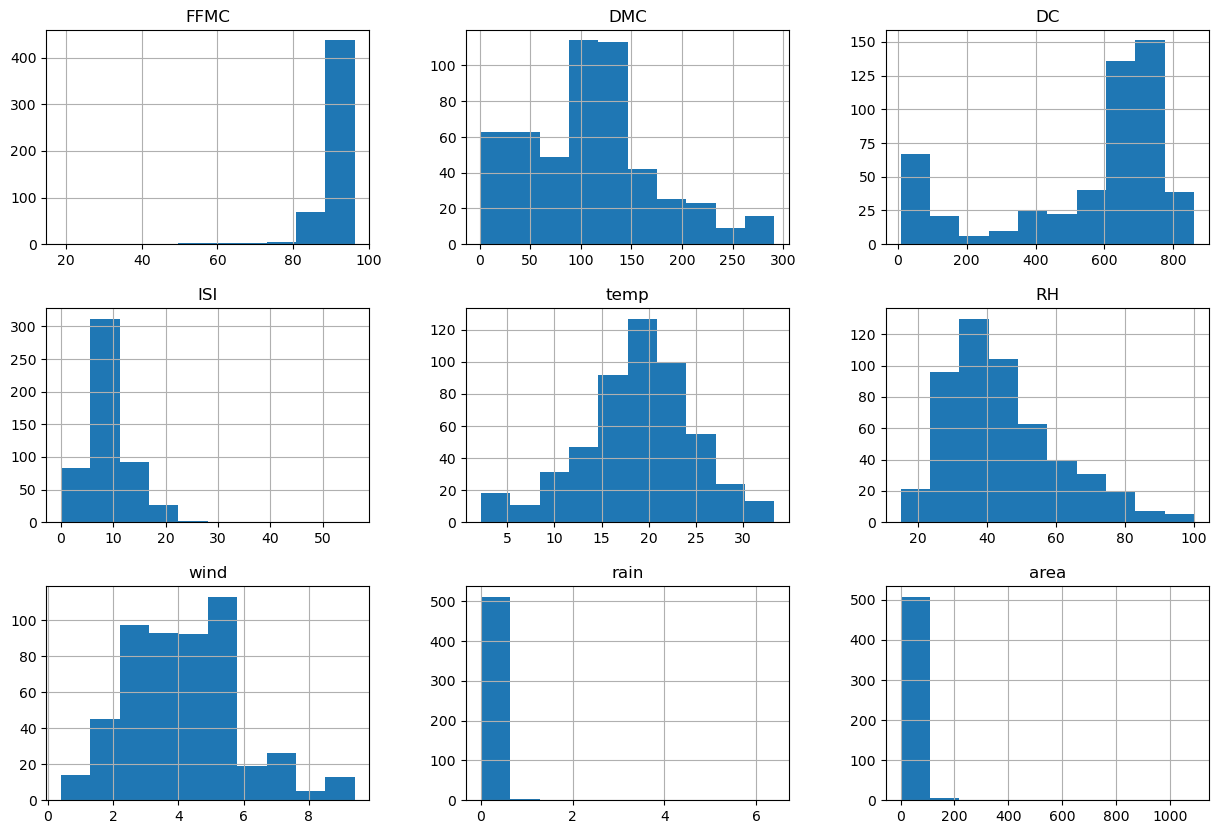

In [62]:
datafile.hist(figsize = (15,10))


Upon observing the data we can see that both rain and area are heavily skewed towards the 0.0 value. We can futurely consider to model the data set with the logarithm transform to achieve better linearity.

# Saving Wrangled Data

On the following code I will be saving the progess of our wrangled data

In [63]:
datafile.to_csv("../data/processed/fires.csv", index= False)